In [1]:
import pandas as pd
df = pd.read_csv('Employee Rating.csv', index_col = ['Employee ID','Employee Name', 'Date'])
df.head(5)

Active Start Time  Active Screen Time  \
Employee ID Employee Name Date                                               
1           Lisa Green    2023-01-01             08:01                1.50   
                          2023-01-02             09:02                3.30   
                          2023-01-03             08:12                4.93   
                          2023-01-04             09:32                4.24   
                          2023-01-05             09:37                2.10   

                                      Active Collaboration Time  Social Time  \
Employee ID Employee Name Date                                                 
1           Lisa Green    2023-01-01                       1.55         1.71   
                          2023-01-02                       1.40         0.58   
                          2023-01-03                       1.63         1.93   
                          2023-01-04                       1.24         1.97   
                          2023-01-05                       1.11         0.79   

                                      Percentage of Task Closed       Role  \
Employee ID Employee Name Date                                               
1           Lisa Green    2023-01-01                         81  Developer   
                          2023-01-02                         61  Developer   
                          2023-01-03                         77  Developer   
                          2023-01-04                         60  Developer   
                          2023-01-05                         67  Developer   

                                      Rating  
Employee ID Employee Name Date                
1           Lisa Green    2023-01-01       3  
                          2023-01-02       2  
                          2023-01-03       3  
                          2023-01-04       3  
                          2023-01-05       2

In [2]:
# convert all the categorical columns in the dataset to numerical values
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def label_encode(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    return df

In [3]:
df = label_encode(df)

In [4]:
df.head()

Active Start Time  Active Screen Time  \
Employee ID Employee Name Date                                                
1           Lisa Green    2023-01-01                  1                1.50   
                          2023-01-02                 62                3.30   
                          2023-01-03                 12                4.93   
                          2023-01-04                 92                4.24   
                          2023-01-05                 97                2.10   

                                      Active Collaboration Time  Social Time  \
Employee ID Employee Name Date                                                 
1           Lisa Green    2023-01-01                       1.55         1.71   
                          2023-01-02                       1.40         0.58   
                          2023-01-03                       1.63         1.93   
                          2023-01-04                       1.24         1.97   
                          2023-01-05                       1.11         0.79   

                                      Percentage of Task Closed  Role  Rating  
Employee ID Employee Name Date                                                 
1           Lisa Green    2023-01-01                         81     1       3  
                          2023-01-02                         61     1       2  
                          2023-01-03                         77     1       3  
                          2023-01-04                         60     1       3  
                          2023-01-05                         67     1       2

<Axes: >

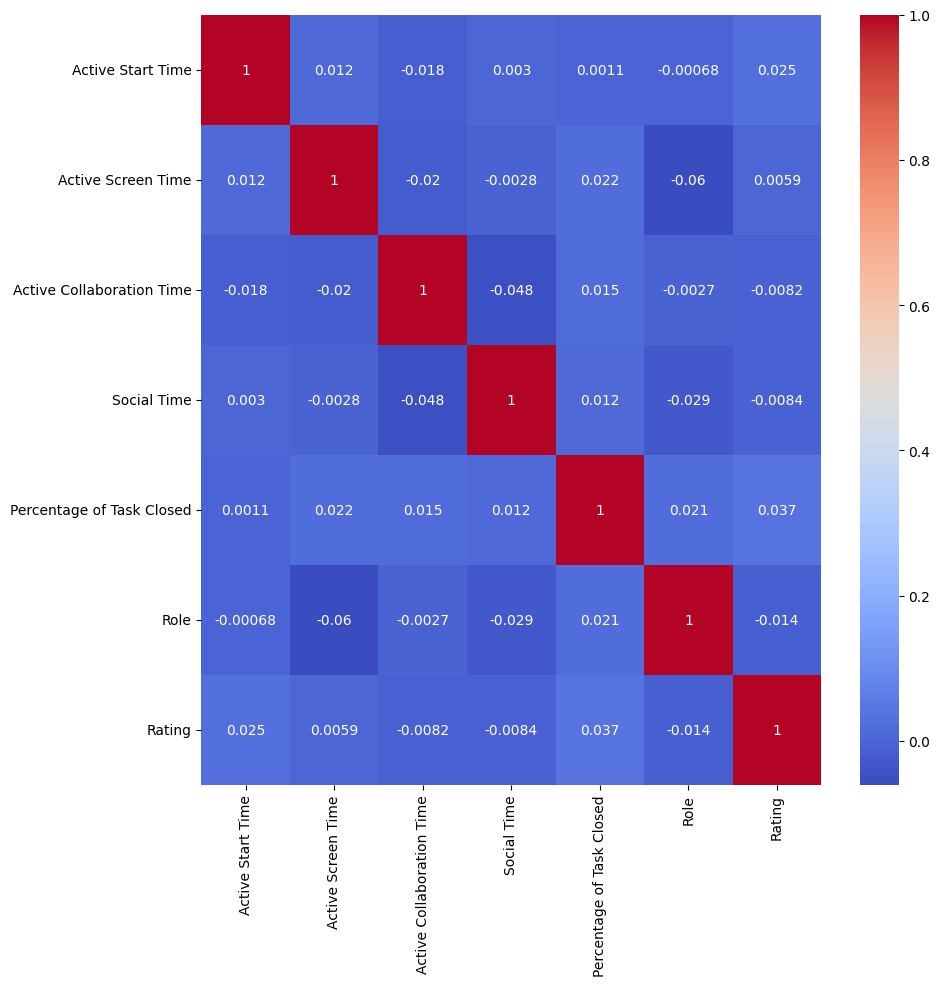

In [5]:
# use spearman correlation to find the correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# create a correlation matrix
corr = df.corr(method='spearman')
# plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [6]:
# do the train test split
from sklearn.model_selection import train_test_split
X = df.drop('Rating', axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
y_pred = rfc.predict(X_test)

In [9]:
# calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

In [10]:
print(round(mae, 2))

1.25


In [11]:
import joblib
joblib.dump(rfc, 'RandomForest.joblib')

['RandomForest.joblib']

In [12]:
X_features = list( df.columns )
X_features.remove( "Rating" )

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split( df[X_features],
                                    df.Rating,
                                    test_size = 0.3,
                                    random_state = 100 )

</i> Below table shows the weightage given to each parameter by random forest model while making the prediction for employee rating on the whole dataset <i>

In [14]:
import warnings
warnings.filterwarnings("ignore")
import eli5.sklearn
eli5.explain_weights( 
    rfc, 
    feature_names = X_features )

Weight,Feature
0.1990 ± 0.0385,Active Screen Time
0.1924 ± 0.0361,Social Time
0.1858 ± 0.0322,Active Collaboration Time
0.1817 ± 0.0355,Active Start Time
0.1618 ± 0.0349,Percentage of Task Closed
0.0793 ± 0.0249,Role


In [15]:
X_test.iloc[0]

Active Start Time            92.00
Active Screen Time            2.63
Active Collaboration Time     1.27
Social Time                   0.26
Percentage of Task Closed    76.00
Role                          4.00
Name: (12, Mike Lee, 2023-03-04), dtype: float64

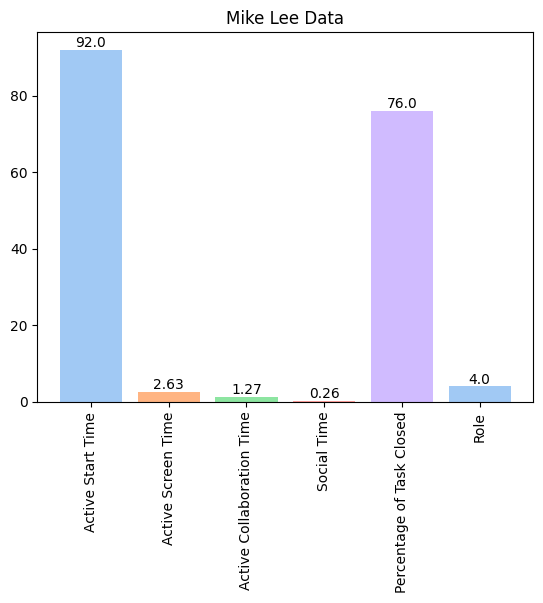

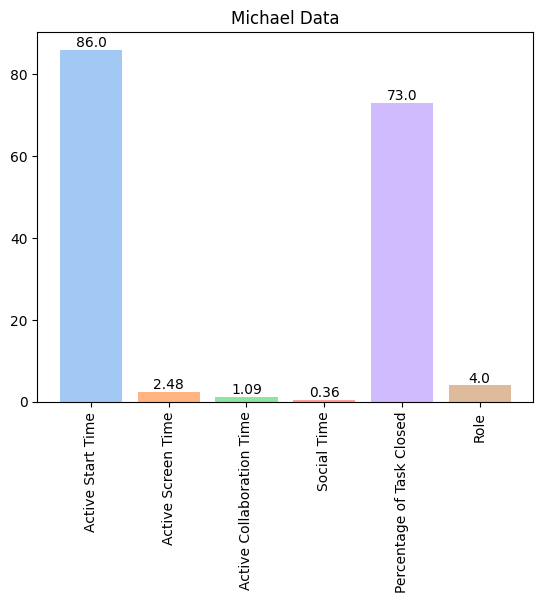

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']
colors = sns.color_palette('pastel')

# Define data for original bar graph
x = X_test.iloc[0].index
y = X_test.iloc[0].values

# Create original bar graph
fig, ax = plt.subplots()
bars = ax.bar(x, y, color=colors[:5])
ax.set_title('Mike Lee Data')
plt.xticks(rotation=90)

# Add text annotations on bars
for i, v in enumerate(y):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Define data for new bar graph
x2 = X_test.iloc[0].index
y2 = [86.0, 2.48, 1.09, 0.36, 73.0, 4.0] # Label encoded Data of another employee called michael

# Create new bar graph
fig, ax2 = plt.subplots()
bars2 = ax2.bar(x2, y2, color=colors[:6])
ax2.set_title('Michael Data')
plt.xticks(rotation=90)

# Add text annotations on bars
for i, v in enumerate(y2):
    ax2.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Show plots
plt.show()

<h4><font color='red'> Active start time is label encoded hence values like 86.0 and 92.0 is shown in the graph instead of 8.46 A.M and 9.02 A.M </font></h4>

</i> Below table shows the contribution each parameter while predicting rating of a perticular employee called "Mike Lee" based on his performance on a single day ( 2023-03-04 ) <i>

In [17]:
eli5.show_prediction( rfc,
                         X_test.iloc[0],
                         feature_names= X_features,
                         target_names = ['Outstanding', 'Good', 'Fair', 'Poor'] )

#### The Model has given Mike Lee a "Good" Rating ( 2 ) hence the probablity for "Good" is 0.710 which is highest among all 4 ratings. We can also check in the above table which parameters where given more consideration while performing the prediction. Since Mike Lee Data and Michael's Data is so similar ( As shown in the above given bar graph ), Michael will also be rated as good ( 2 ).

<h4><font color='red'>Disclaimer :- Since we are using a dummy dataset above shown table may not reflect the real life scenario where "Good" rating will be given based on higher "Social Time", "Active Collabration Time" and "Percentage of Task Closed". It is just for demonstration purposes. </font></h4>

In [18]:
eli5.show_prediction( rfc,
                         X_test.iloc[1],
                         feature_names= X_features,
                         target_names = ['Outstanding', 'Good', 'Fair', 'Poor'] )

In [19]:
eli5.show_prediction( rfc,
                         X_test.iloc[2],
                         feature_names= X_features,
                         target_names = ['Outstanding', 'Good', 'Fair', 'Poor'] )

In [20]:
eli5.show_prediction( rfc,
                         X_test.iloc[3],
                         feature_names= X_features,
                         target_names = ['Outstanding', 'Good', 'Fair', 'Poor'] )
